In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Straight Road 
# data_folders = [
#     '../data/routes_short_2023-05-05|22:07:50/', #444
#     '../data/routes_short_2023-05-18|17:31:36/', #346
#     '../data/routes_short_2023-05-22|16:42:21/'  #419
# ]

#Curve Road
data_folders = [
    '../data/routes_short_2023-05-12|17:04:09/', #814
    '../data/routes_short_2023-05-26|17:51:48/', #721
]

#NSGA Curve Road
# data_folders = [
#     '../data/routes_short_2023-05-26|13:18:12/', #216
#     '../data/routes_short_2023-05-29|15:33:07/', #393
# ]


#NSGA Straight Road
# data_folders = [
#     '../data/routes_short_2023-05-30|13:15:09/', #310 fitness score: 'RouteCompletionTest', 'CollisionTest', 'OutsideRouteLanesTest', 'Timeout'
# ]

#Surrogate Curve Road
# data_folders = [
#     '../data/routes_short_2023-05-31|16:26:55/', #393 Random forest, Trained by 814+721
# ]

### Time consumption for each cases

In [3]:
image_folders = []
for data_folder in data_folders:
    for sub_folder in os.listdir(data_folder):
        if not sub_folder.endswith('.csv'): 
            image_folders.append(data_folder+sub_folder)
image_folders.sort()
image_folders = image_folders[:-1]
len(image_folders), image_folders[0]

(1527, '../data/routes_short_2023-05-12|17:04:09/routes_short_05_12_17_04_19')

In [4]:
number_of_frames = []
tuple_frame_file = []
for image_folder in image_folders:
    number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

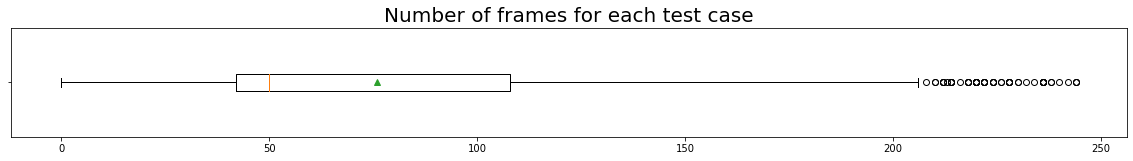

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,2))
plt.boxplot(number_of_frames, labels=[''], vert=False, showmeans=True)
plt.title("Number of frames for each test case", fontsize=20)
plt.show()

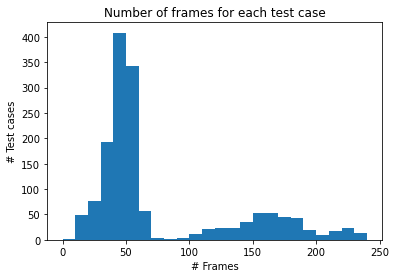

array([  1.,  48.,  77., 192., 408., 342.,  57.,   4.,   2.,   4.,  12.,
        21.,  24.,  24.,  35.,  52.,  52.,  44.,  42.,  19.,  10.,  17.,
        23.,  13.])

In [6]:
bins = plt.hist(number_of_frames, bins=range(0,250,10))
plt.title("Number of frames for each test case")
plt.ylabel('# Test cases')
plt.xlabel('# Frames')
plt.show()
bins[0]

### Fitness score and number

(1526, 14)


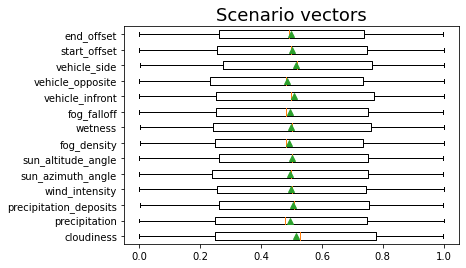

In [7]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

scenarios = pd.read_csv(data_folders[0]+'scenario.csv',names=scenario_header)
for i in range(1, len(data_folders)):
    scenarios = pd.concat([scenarios, pd.read_csv(data_folders[i]+'scenario.csv',names=scenario_header)])
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

(1526, 5)


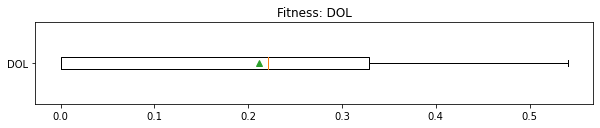

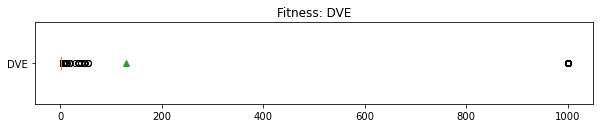

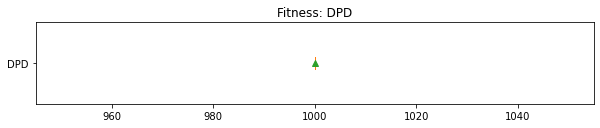

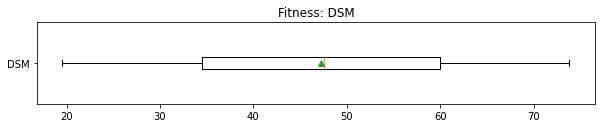

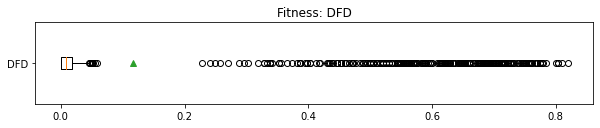

In [8]:
fitness_header = ["DOL","DVE","DPD","DSM","DFD"]
fitnesses = pd.read_csv(data_folders[0]+'fitness.csv',names=fitness_header)
for i in range(1, len(data_folders)):
    fitnesses = pd.concat([fitnesses, pd.read_csv(data_folders[i]+'fitness.csv',names=fitness_header)])
print(fitnesses.shape)
        
for fitness_label in fitness_header:
    plt.figure(figsize=(10,1.5))
    plt.boxplot(fitnesses[fitness_label], labels=[fitness_label], vert=False, showmeans=True)
    plt.title('Fitness: '+fitness_label)
    plt.show()

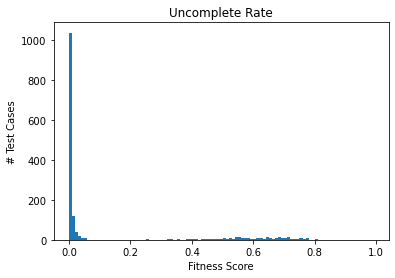

In [9]:
bins = plt.hist(fitnesses['DFD'], bins=np.arange(0,1,0.01))
plt.title('Uncomplete Rate')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()

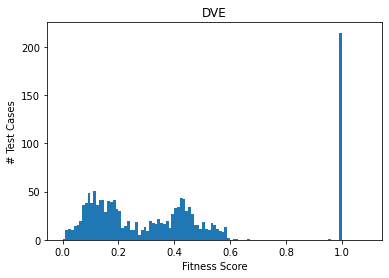

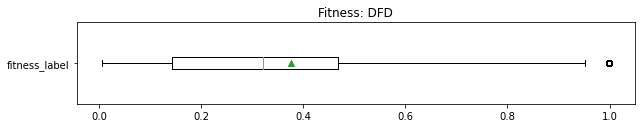

In [10]:
DVE_score = fitnesses['DVE'].to_numpy()
DVE_score = DVE_score/5
DVE_score[DVE_score>1] = 0.9999

bins = plt.hist(DVE_score, bins=np.arange(0,1.1,0.01))
plt.title('DVE')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()
        
plt.figure(figsize=(10,1.5))
plt.boxplot(DVE_score, labels=['fitness_label'], vert=False, showmeans=True)
plt.title('Fitness: '+fitness_label)
plt.show()

In [11]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]
criterions = pd.read_csv(data_folders[0]+'criterion-replace.csv',names=criterion_header)
for i in range(1, len(data_folders)):
    criterions = pd.concat([criterions, pd.read_csv(data_folders[i]+'criterion.csv',names=criterion_header)])
print(criterions.shape)
criterions.head()

(1526, 15)


,RouteCompletionTest,RouteCompletionTest_figure,OutsideRouteLanesTest,OutsideRouteLanesTest_figure,CollisionTest,CollisionTest_figure,RunningRedLightTest,RunningRedLightTest_figure,RunningStopTest,RunningStopTest_figure,InRouteTest,InRouteTest_figure,AgentBlockedTest,AgentBlockedTest_figure,Timeout
0,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
1,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
2,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
3,1,27.80,1,60.94,1,1,0,0,0,0,0,0,0,0,0
4,1,94.98,0,0.00,0,0,0,0,0,0,0,0,0,0,1


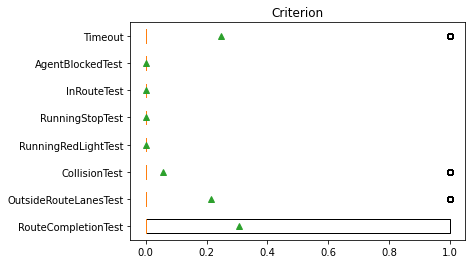

In [12]:
criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        "RunningRedLightTest",   
                        "RunningStopTest",       
                        "InRouteTest", 
                        "AgentBlockedTest",
                        "Timeout"]
# plt.figure(figsize=(10,1.5))
plt.boxplot(criterions[criterion_bool_head], labels=criterion_bool_head, vert=False, showmeans=True)
plt.title('Criterion')
plt.show()

In [13]:
criterions[criterion_bool_head][criterions[criterion_bool_head].sum(axis=1) == 3]

,RouteCompletionTest,OutsideRouteLanesTest,CollisionTest,RunningRedLightTest,RunningStopTest,InRouteTest,AgentBlockedTest,Timeout
3,1,1,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1
16,1,1,1,0,0,0,0,0
27,1,1,1,0,0,0,0,0
28,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
689,1,1,1,0,0,0,0,0
694,1,1,1,0,0,0,0,0
701,1,1,1,0,0,0,0,0
703,1,1,0,0,0,0,0,1


In [14]:
print(len(criterions))
(criterions[criterion_bool_head] == 1).sum()

1526


RouteCompletionTest      467
OutsideRouteLanesTest    326
CollisionTest             89
RunningRedLightTest        0
RunningStopTest            0
InRouteTest                0
AgentBlockedTest           0
Timeout                  378
dtype: int64

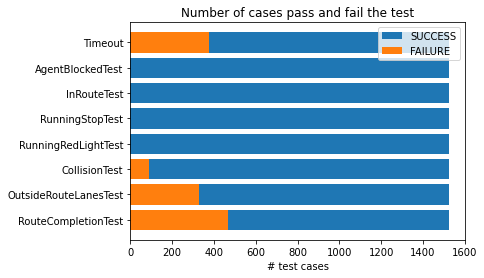

In [15]:
import matplotlib.pyplot as plt

plt.barh(criterion_bool_head, [criterions.shape[0]]*8)
plt.barh(criterion_bool_head, (criterions[criterion_bool_head] == 1).sum())
plt.legend(['SUCCESS','FAILURE'])
plt.title('Number of cases pass and fail the test')
plt.xlabel('# test cases')
plt.show()

(-0.1428, 1.0)


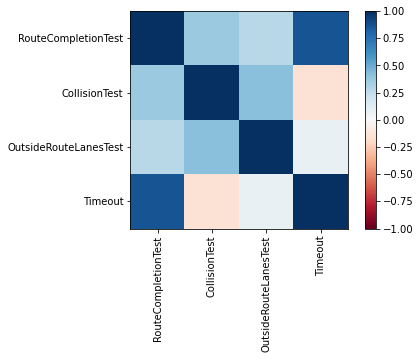

In [16]:
# select_criterions = ["RouteCompletionTest", "CollisionTest", "RunningRedLightTest", "Timeout"]
select_criterions = ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"] 

scenario_criterion = pd.concat([scenarios, criterions[select_criterions]],axis=1)

print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[14:18, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[14:18, 14:18].max(), 4)))

plt.imshow(scenario_criterion.corr().to_numpy()[14:18,14:18], cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(4),scenario_criterion.columns.tolist()[14:18])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()

(-0.1088, 0.6199)


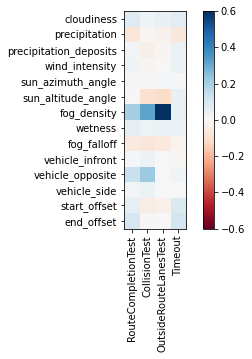

In [17]:
scenario_criterion = pd.concat([scenarios, criterions[select_criterions]],axis=1)

print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure

In [18]:
importance = []
for i, name in enumerate(scenario_criterion.columns.tolist()[:14]):
    importance.append((sum(scenario_criterion.corr().to_numpy()[:14, 14:18][i]**2)**0.5, name))
importance.sort()
importance

[(0.014604688644378158, 'sun_azimuth_angle'),
 (0.03563777853904182, 'vehicle_infront'),
 (0.042140981505714124, 'vehicle_side'),
 (0.05172717697954715, 'wind_intensity'),
 (0.05725854750040236, 'precipitation_deposits'),
 (0.08085722690949028, 'wetness'),
 (0.10302257450353236, 'precipitation'),
 (0.10904465255059707, 'fog_falloff'),
 (0.11547634634874927, 'start_offset'),
 (0.11861474766520103, 'cloudiness'),
 (0.15056683034142593, 'sun_altitude_angle'),
 (0.15212847256857323, 'end_offset'),
 (0.2572717863019977, 'vehicle_opposite'),
 (0.7247790351844327, 'fog_density')]

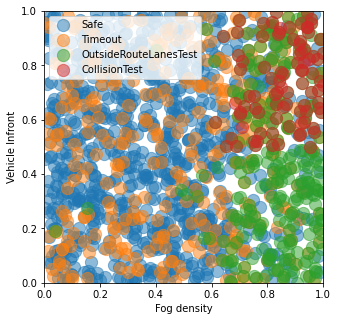

In [22]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

# X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
# pca = PCA(n_components=2)
# # pca = PCA()
# pca.fit(X)

test_target = ['RouteCompletionTest','Timeout','OutsideRouteLanesTest','CollisionTest']
factors = ['fog_density', 'vehicle_opposite']

# colors = ['#BCCBE5', '#FFD5AB', '#FFCCC3', '#B1D0A9', '#C1BCBF', '#E5CDCC']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
s=150 
alpha = 0.5

# Plot
success_case = scenario_criterion[test_target].sum(axis=1) == 0
plt.figure(figsize=(5,5))
plt.scatter(scenario_criterion[factors[0]][success_case], 
            scenario_criterion[factors[1]][success_case],
            c = colors[0], s=s, alpha=alpha)

for i, certion_label in enumerate(test_target[1:]):
    plt.scatter(scenario_criterion[factors[0]][(scenario_criterion[certion_label] == 1)], 
                scenario_criterion[factors[1]][(scenario_criterion[certion_label] == 1)],
                c = colors[i+1], s=s, alpha=alpha)


plt.xlim((0,1))
plt.ylim((0,1))
plt.legend(['Safe']+test_target[1:])

plt.xlabel('Fog density')
plt.ylabel('Vehicle Infront')

plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import joblib

seed = 42

max_f1_sum = 0
# for i in range(1,11,1):
for i in range(6,7):

    print("max_depth:",i)
    print("                      | Train F1 | Test F1")
    print("------------------------------------------")
    f1_sum = 0
    for certion_label in ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"]:
        X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
        y = scenario_criterion[certion_label].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


        clf = RandomForestClassifier(max_depth=i, random_state=seed, class_weight={0:sum(y==1)/len(y), 1:sum(y==0)/len(y)})
        # clf = LogisticRegression(random_state=seed)
        clf.fit(X_train, y_train)

        acc = sum(clf.predict(X_test)==y_test)/len(y_test)
        print("{:>21} | {:0<7}  | {:0<7}".format(
            certion_label,
            round(f1_score(clf.predict(X_train), y_train), 5), 
            round(f1_score(clf.predict(X_test), y_test), 5)
        ))

        joblib.dump(clf, 'models/RF-{}.pkl'.format(certion_label))
        # print(clf.predict(X_test))
        f1_sum += f1_score(clf.predict(X_test), y_test)
    print()
    print()


max_depth: 6
                      | Train F1 | Test F1
------------------------------------------
  RouteCompletionTest | 0.85053  | 0.60000
        CollisionTest | 0.81633  | 0.60317
OutsideRouteLanesTest | 0.94043  | 0.87273
              Timeout | 0.89532  | 0.36181




In [32]:
clf = joblib.load('models/RF-Timeout.pkl')
acc = sum(clf.predict(X_test)==y_test)/len(y_test)
print("{:>21} | {:0<7}  | {:0<7}".format(
    certion_label,
    round(f1_score(clf.predict(X_train), y_train), 5), 
    round(f1_score(clf.predict(X_test), y_test), 5)
))

              Timeout | 0.89532  | 0.36181


In [90]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(14, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [91]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)